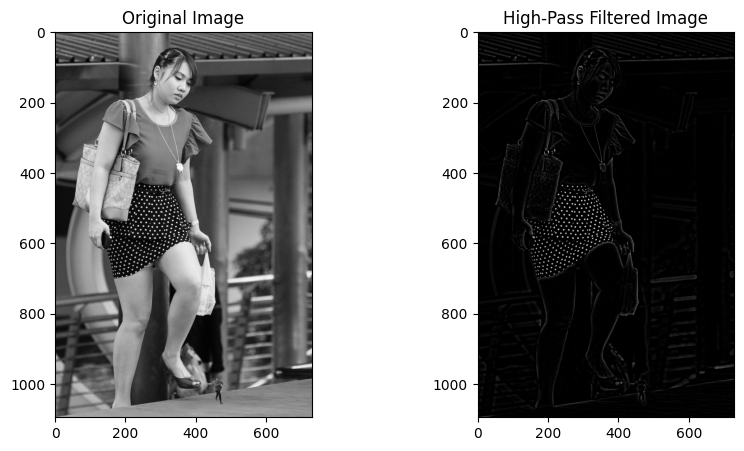

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the grayscale image using OpenCV
image = cv2.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg', cv2.IMREAD_GRAYSCALE)

# Function to apply High-Pass Filter using OpenCV
def apply_high_pass_filter(image):
    # Create a Gaussian Blur
    blurred = cv2.GaussianBlur(image, (21, 21), 0)

    # Subtract the blurred image from the original image to get the high frequencies
    high_pass = cv2.subtract(image, blurred)

    return high_pass

# Apply the high-pass filter
image_filtered = apply_high_pass_filter(image)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(image_filtered, cmap='gray'), plt.title('High-Pass Filtered Image')
plt.show()

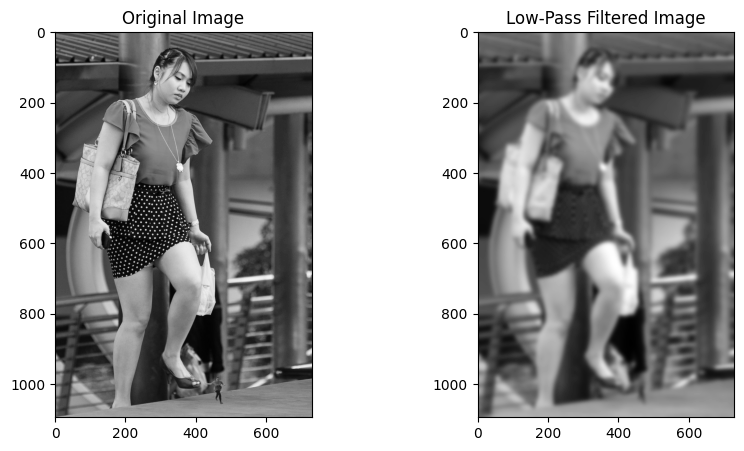

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg', 0)

# Apply a Gaussian Blur (which is a type of low-pass filter)
low_pass_filtered_image = cv2.GaussianBlur(image, (35, 35), 0)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(low_pass_filtered_image, cmap='gray'), plt.title('Low-Pass Filtered Image')
plt.show()

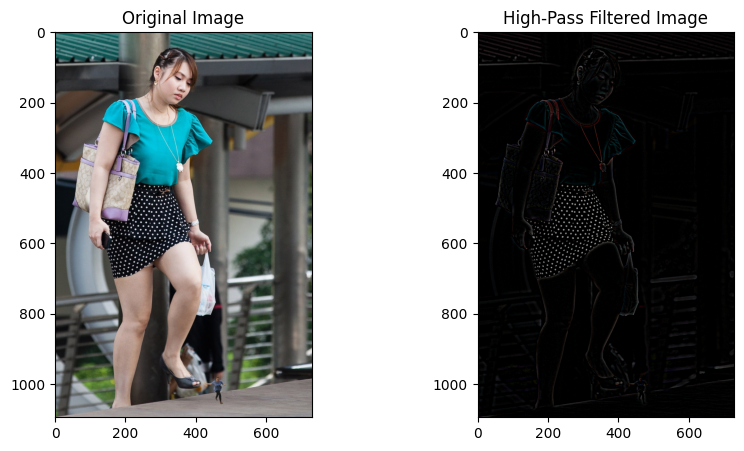

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the color image using OpenCV
image = cv2.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to apply High-Pass Filter to a single channel using OpenCV
def apply_high_pass_filter(image_channel):
    # Create a Gaussian Blur
    blurred = cv2.GaussianBlur(image_channel, (21, 21), 0)

    # Subtract the blurred image from the original image to get the high frequencies
    high_pass = cv2.subtract(image_channel, blurred)

    return high_pass

# Apply the filter to each channel
filtered_channels = [apply_high_pass_filter(image[:, :, i]) for i in range(3)]

# Merge the filtered channels back into a color image
image_filtered = cv2.merge(filtered_channels)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(image_filtered), plt.title('High-Pass Filtered Image')
plt.show()


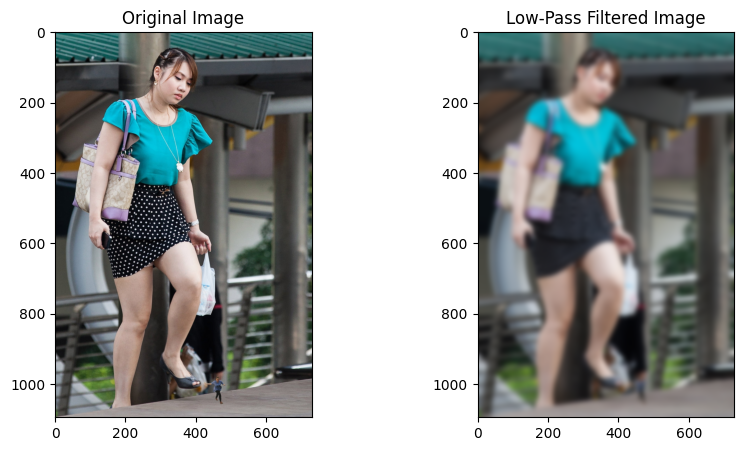

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the color image
image = cv2.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg')

# Convert the image from BGR (OpenCV format) to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian Blur to each channel separately
blurred_image = np.zeros_like(image)
for i in range(3):  # Loop over the three channels
    blurred_image[:, :, i] = cv2.GaussianBlur(image[:, :, i], (45, 45), 0)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(blurred_image), plt.title('Low-Pass Filtered Image')
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_6584\336160456.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg', mode='F')
C:\Users\kevin\AppData\Local\Temp\ipykernel_6584\336160456.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg', mode='L')


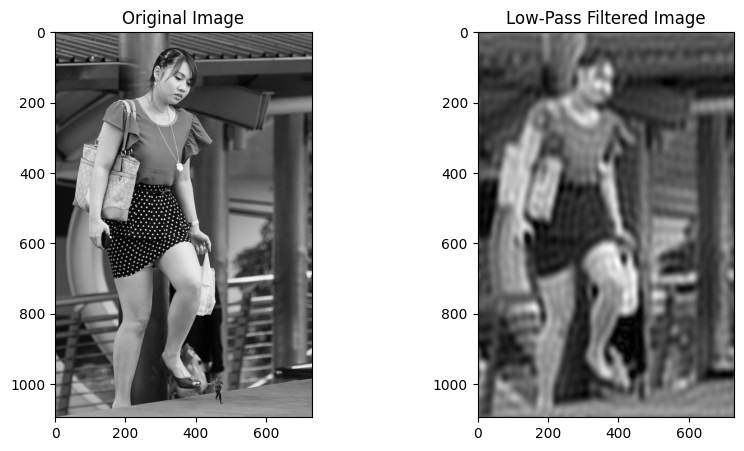

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import imageio

# Read the image using imageio
image = imageio.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg', mode='F')
image = imageio.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg', mode='L')

# Perform the Fourier transform
F = fftpack.fft2(image)
Fshift = fftpack.fftshift(F)

# Create a low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
radius = 30  # Radius of the low-pass filter
mask = np.zeros((rows, cols), np.uint8)
center = (crow, ccol)
x, y = np.ogrid[:rows, :cols]
mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= radius ** 2
mask[mask_area] = 1

# Apply the mask to the Fourier transformed image
Fshift_filtered = Fshift * mask

# Inverse Fourier transform to get the filtered image
F_ishift = fftpack.ifftshift(Fshift_filtered)
image_filtered = fftpack.ifft2(F_ishift)
image_filtered = np.abs(image_filtered)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(image_filtered, cmap='gray'), plt.title('Low-Pass Filtered Image')
plt.show()


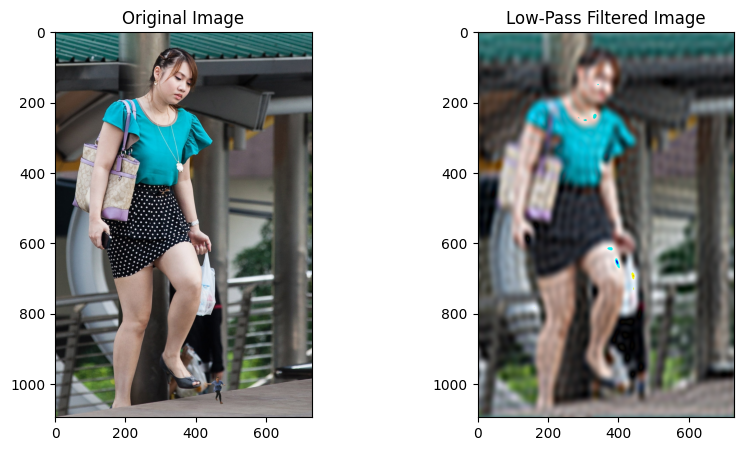

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import imageio.v2 as imageio

# Read the color image using imageio
image = imageio.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg')

# Function to apply Fourier Transform and Low-Pass Filter to a single channel
def apply_low_pass_filter(image_channel, radius):
    # Perform the Fourier transform
    F = fftpack.fft2(image_channel)
    Fshift = fftpack.fftshift(F)

    # Create a low-pass filter
    rows, cols = image_channel.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= radius ** 2
    mask[mask_area] = 1

    # Apply the mask to the Fourier transformed image
    Fshift_filtered = Fshift * mask

    # Inverse Fourier transform to get the filtered image
    F_ishift = fftpack.ifftshift(Fshift_filtered)
    image_filtered = fftpack.ifft2(F_ishift)
    image_filtered = np.abs(image_filtered)

    return image_filtered

# Apply the filter to each channel
radius = 30  # Radius of the low-pass filter
filtered_channels = [apply_low_pass_filter(image[:, :, i], radius) for i in range(3)]

# Merge the filtered channels back into a color image
image_filtered = np.stack(filtered_channels, axis=-1)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(image_filtered.astype(np.uint8)), plt.title('Low-Pass Filtered Image')
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_6584\2568401021.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg')


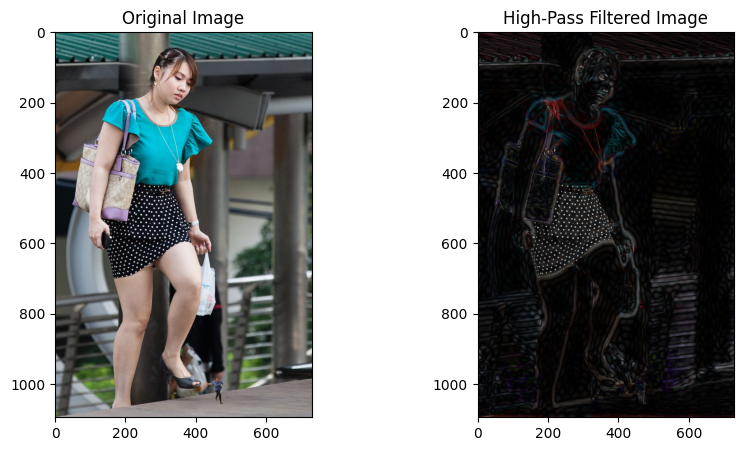

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import imageio

# Read the color image using imageio
image = imageio.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg')

# Function to apply Fourier Transform and High-Pass Filter to a single channel
def apply_high_pass_filter(image_channel, radius):
    # Perform the Fourier transform
    F = fftpack.fft2(image_channel)
    Fshift = fftpack.fftshift(F)

    # Create a high-pass filter
    rows, cols = image_channel.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= radius ** 2
    mask[mask_area] = 0

    # Apply the mask to the Fourier transformed image
    Fshift_filtered = Fshift * mask

    # Inverse Fourier transform to get the filtered image
    F_ishift = fftpack.ifftshift(Fshift_filtered)
    image_filtered = fftpack.ifft2(F_ishift)
    image_filtered = np.abs(image_filtered)

    return image_filtered

# Apply the filter to each channel
radius = 30  # Radius of the high-pass filter
filtered_channels = [apply_high_pass_filter(image[:, :, i], radius) for i in range(3)]

# Merge the filtered channels back into a color image
image_filtered = np.stack(filtered_channels, axis=-1)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(image_filtered.astype(np.uint8)), plt.title('High-Pass Filtered Image')
plt.show()


In [103]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def partial_blurr(img_path, blur_radius, x, y, w, h):
    # Read the grayscale image using OpenCV
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Create a blurred version of the image
    blurred_image = cv2.GaussianBlur(image, (blur_radius, blur_radius), 0)

    # Combine the original and blurred images
    combined_image = blurred_image.copy()
    combined_image[y:y+h, x:x+w] = image[y:y+h, x:x+w]

    # Display the original, blurred, and combined images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1), plt.scatter(x, y, color='red', marker='o'),plt.scatter(x+w, y+h, color='blue', marker='o'),plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 3, 2), plt.scatter(x, y, color='red', marker='o'),plt.scatter(x+w, y+h, color='blue', marker='o'),plt.imshow(blurred_image, cmap='gray'), plt.title('Blurred Image')
    plt.subplot(1, 3, 3), plt.scatter(x, y, color='red', marker='o'),plt.scatter(x+w, y+h, color='blue', marker='o'),plt.imshow(combined_image, cmap='gray'), plt.title('Selective Blur Image')
    plt.show()


In [104]:
import pandas as pd
import os
import re

# Function to remove '_v1' from the filename
def remove_version(filename):
    return re.sub(r'_v\d+', '', filename)

face_bbox_data = pd.read_csv('../data/PyFeat_output_1127.csv')

face_bbox_data['input'] = face_bbox_data['input'].apply(os.path.basename)
face_bbox_data = face_bbox_data.get(['input', 'FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight']).set_index('input')

# X, Y, W, H
def get_bbox(img_name, bbox_data):
    return np.array(bbox_data.loc[img_name]).astype(int)

In [ ]:
def plot_bbox(img_pth):
    original = remove_version(train_data.get('imageName')[i])
x,y,w,h= get_bbox(train_data.get('imageName')[i], face_bbox_data)
a,b,c = cv2.imread(os.path.join('../data/Stimuli_allRetain', original)).shape
a1,b1,c1 = cv2.imread(os.path.join('../data/Stimuli_psRec', train_data.get('imageName')[i])).shape
scale_x = a / a1
scale_y = b / b1
partial_blurr(os.path.join('../data/Stimuli_allRetain', original), 33, int(x * scale_x), int(y * scale_y), int(w * scale_x), int(h * scale_y))
partial_blurr(os.path.join('../data/Stimuli_psRec', train_data.get('imageName')[i]), 33, x,y,w,h)
print(a,b,c)
print(a1,b1,c1)
print(x,y,w,h)
print(scale_x)

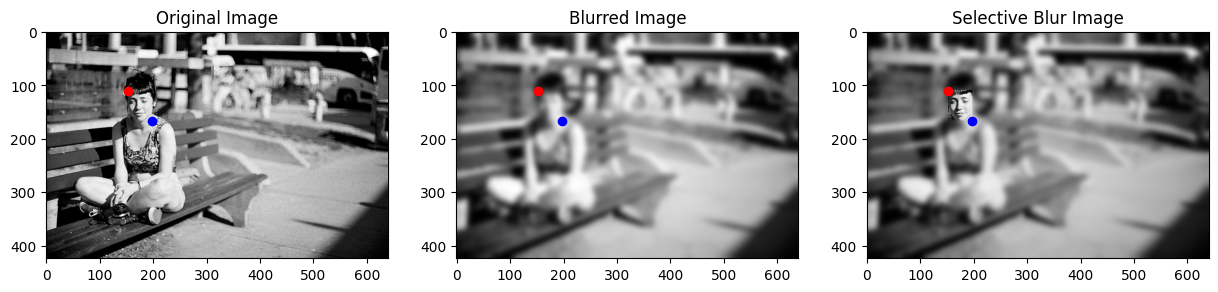

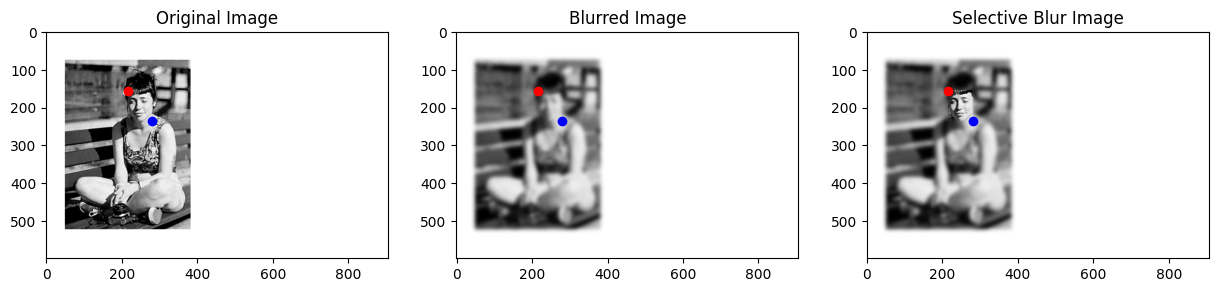

424 640 3
600 906 3
216 156 64 81
0.7066666666666667


In [102]:
train_data = pd.read_csv('../data/train.csv')
i = 6
original = remove_version(train_data.get('imageName')[i])
x,y,w,h= get_bbox(train_data.get('imageName')[i], face_bbox_data)
a,b,c = cv2.imread(os.path.join('../data/Stimuli_allRetain', original)).shape
a1,b1,c1 = cv2.imread(os.path.join('../data/Stimuli_psRec', train_data.get('imageName')[i])).shape
scale_x = a / a1
scale_y = b / b1
partial_blurr(os.path.join('../data/Stimuli_allRetain', original), 33, int(x * scale_x), int(y * scale_y), int(w * scale_x), int(h * scale_y))
partial_blurr(os.path.join('../data/Stimuli_psRec', train_data.get('imageName')[i]), 33, x,y,w,h)
print(a,b,c)
print(a1,b1,c1)
print(x,y,w,h)
print(scale_x)

In [62]:
import joblib

with open('../data\PARE\demo\9eequqtu0fpr63kexs.jpg\pare_output.pkl', 'rb') as f:
    data = joblib.load(f)

data

{1: {'pred_cam': array([[ 2.1031744 , -0.01506748,  0.33768964]], dtype=float32),
  'orig_cam': array([[1.27799758, 1.92125637, 0.08454647, 0.35819977]]),
  'verts': array([[[-0.00203513, -0.6936883 , -0.44157183],
          [-0.008878  , -0.67879665, -0.4440712 ],
          [ 0.0035264 , -0.67774373, -0.43543255],
          ...,
          [-0.11244174, -0.6853593 , -0.32195318],
          [-0.11295527, -0.68680626, -0.32395416],
          [-0.11630955, -0.6835059 , -0.32533544]]], dtype=float32),
  'pose': array([[[[ 9.98539448e-01, -5.35643101e-02,  7.05230329e-03],
           [-5.03170192e-02, -9.69555974e-01, -2.39644602e-01],
           [ 1.96739957e-02,  2.38939762e-01, -9.70835090e-01]],
  
          [[ 9.86776412e-01, -3.47359898e-03, -1.62050188e-01],
           [ 1.56163946e-01,  2.88182825e-01,  9.44755793e-01],
           [ 4.34183776e-02, -9.57569063e-01,  2.84914464e-01]],
  
          [[ 9.83520210e-01,  6.56430647e-02,  1.68460414e-01],
           [-1.78709447e-01,  2.1